# Challenge: Smart City Performance Analysis and Recommendations


---



# Step 1: Load and Understand the Data


---


**Explanation**:
Understand the structure and contents of the dataset to ensure the correct columns are being used for analysis and visualization.

**Outcome**:
A clear understanding of the dataset's structure, columns, and data types.

**Instructions**:

* Load the dataset.
* Display the first few rows and data types of each column to understand the data structure.


In [ ]:
# Step 1: Load Air Quality Data into Google Colab
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
smart_city_data = pd.read_csv("Smart_City_index_India.csv")

# Display the first few rows
smart_city_data.head()


Saving Smart_City_index_India.csv to Smart_City_index_India.csv


Id        City      Country  Smart_Mobility   Smart_Environment  \
0   1        Oslo       Norway             6480               6512   
1   2      Bergen       Norway             7097               6876   
2   3   Amsterdam  Netherlands             7540               5558   
3   4  Copenhagen      Denmark             7490               7920   
4   5   Stockholm       Sweden             6122               7692   

   Smart_Government   Smart_Economy   Smart_People  Smart_Living  \
0               7516            4565          8618          9090   
1               7350            4905          8050          9090   
2               8528            8095          7098          7280   
3               8726            5580          5780          7200   
4               8354            4330          6743          7730   

   SmartCity_Index  SmartCity_Index_relative_Edmonton  
0             7138                                666  
1             7296                                823  
2             7311                                839  
3             7171                                698  
4             6812                                340

# Step 2: Rank Cities Based on Smart City Index


---


**Explanation**:
Rank cities based on their SmartCity_Index to identify the top-performing and lower-performing cities.

**Outcome**:
A ranked list of cities based on their SmartCity_Index.

**Instructions**:

* Rank cities based on SmartCity_Index.
* Sort the data by rank.
* Create a bar plot of city rankings.

<ipython-input-15-436e92accb16>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=smart_city_data_sorted, x='SmartCity_Index', y='City', palette='viridis')


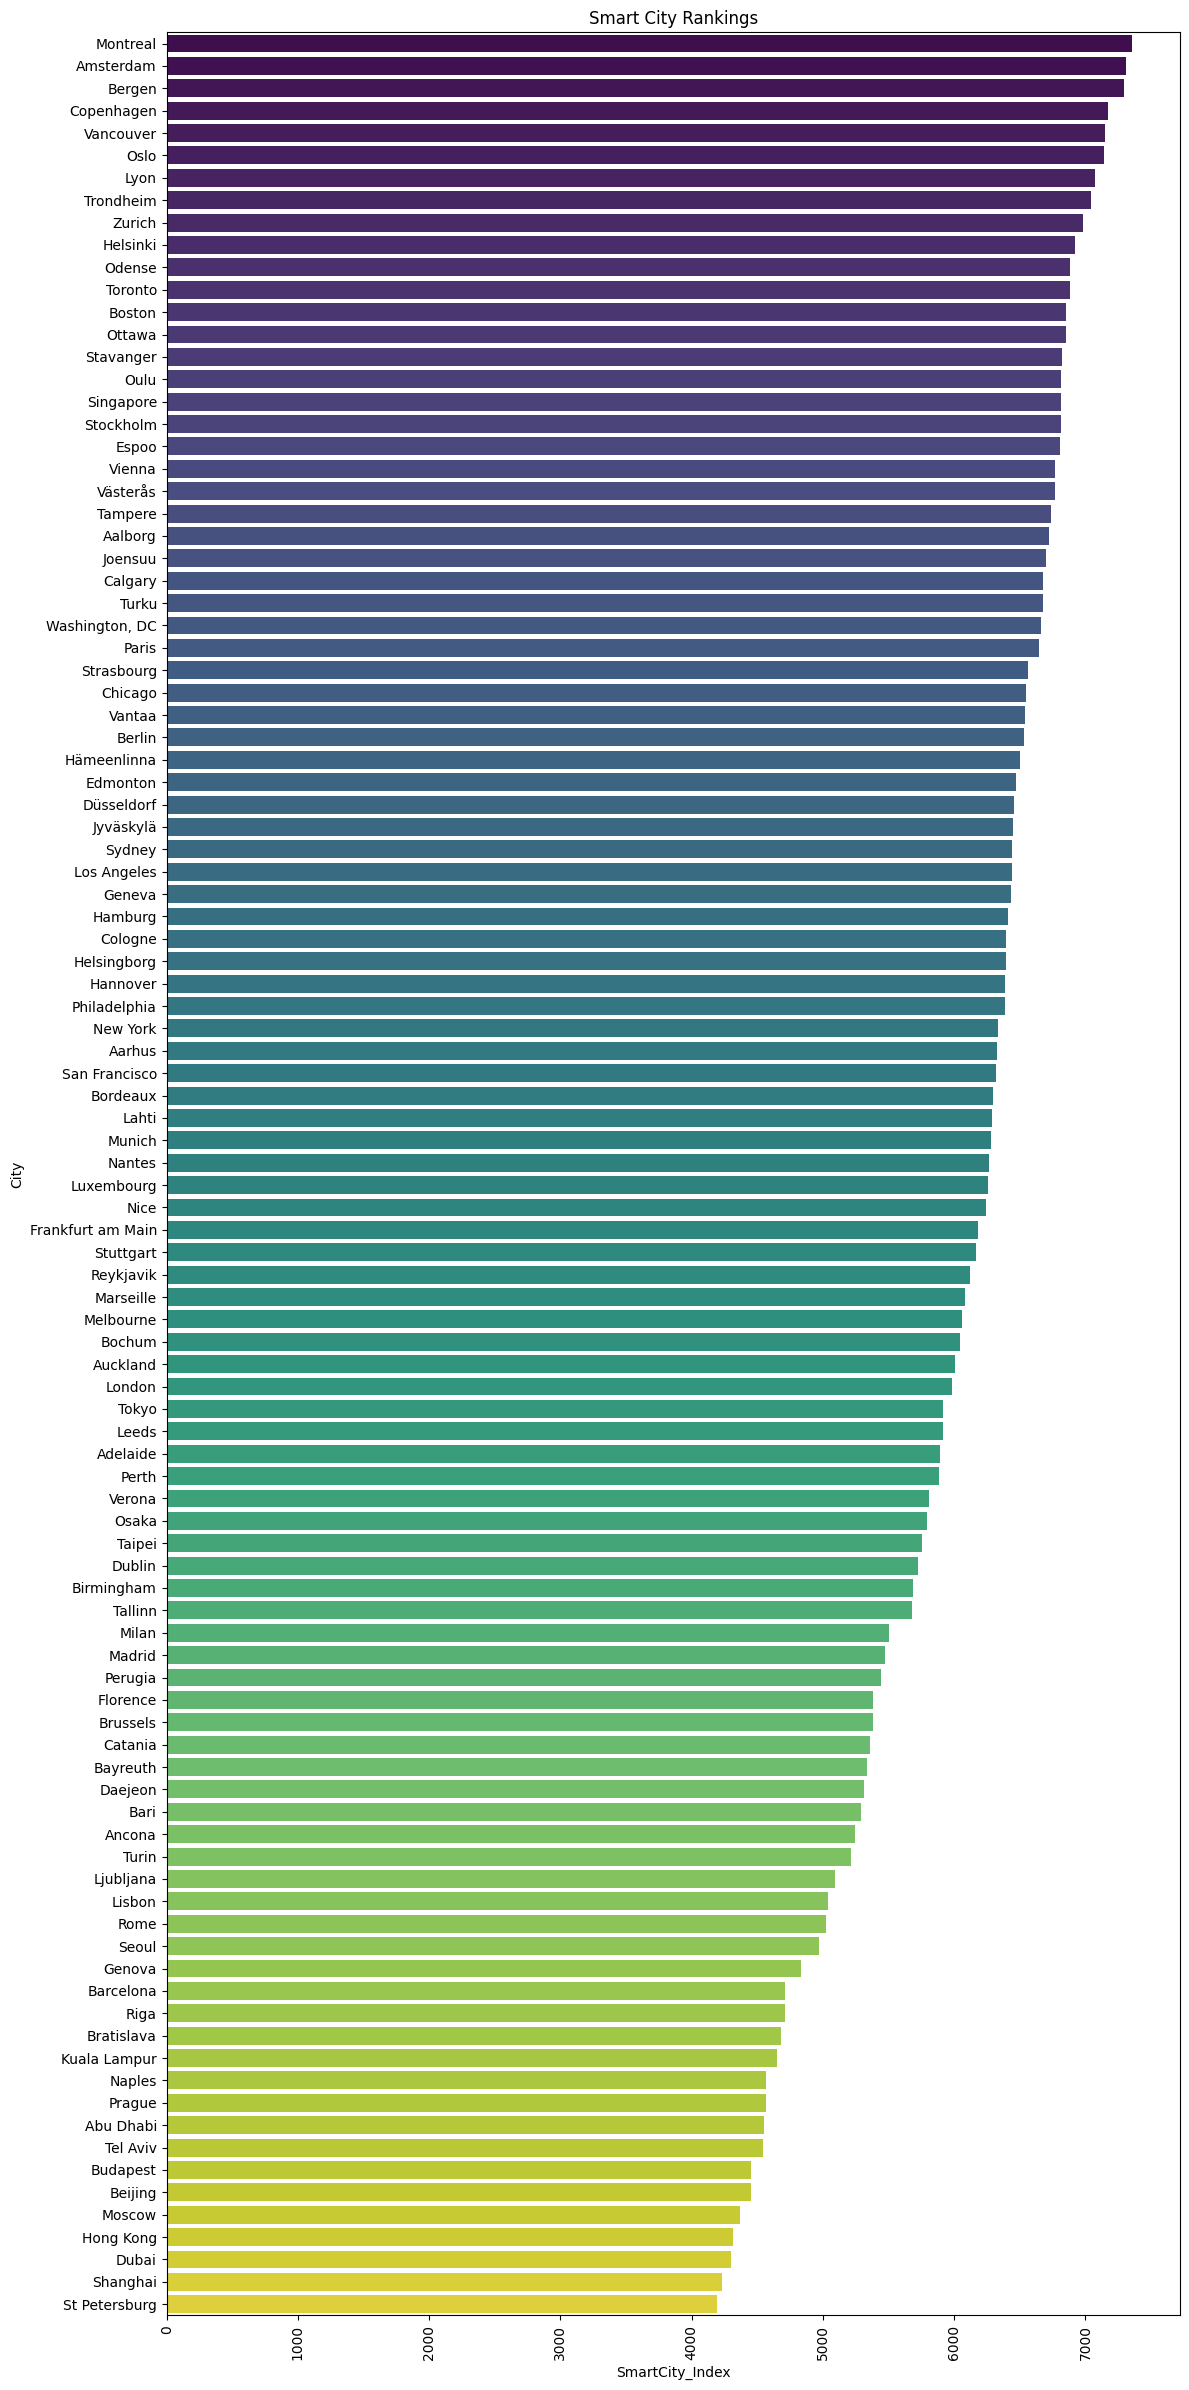

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rank the cities based on SmartCity_Index
smart_city_data['Rank'] = smart_city_data['SmartCity_Index'].rank(ascending=False)

# Sort the data by Rank
smart_city_data_sorted = smart_city_data.sort_values(by='Rank')

# Visualization 1: Bar plot of city rankings
plt.figure(figsize=(12, 24))  # Increase the height of the figure
sns.barplot(data=smart_city_data_sorted, x='SmartCity_Index', y='City', palette='viridis')
plt.title('Smart City Rankings')
plt.xlabel('SmartCity_Index')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Step 3: Apply Machine Learning for City Performance Clustering


---



**Explanation**:
Use a clustering algorithm to categorize cities into performance levels (High, Moderate, Low) based on their smart city indices.

**Outcome**:
Cities categorized into different performance levels.

**Instructions**:

* Select features for clustering.
* Standardize the features.
* Apply KMeans clustering.
* Add the cluster labels to the dataset.
* Only: 'Smart_Environment', 'Smart_Environment', 'Smart_People', 'Smart_Living'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['Smart_Environment', 'Smart_Environment', 'Smart_People', 'Smart_Living']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(smart_city_data[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
smart_city_data['Performance_Level'] = kmeans.fit_predict(scaled_features)

# Map the cluster labels to meaningful names
performance_map = {0: 'Low', 1: 'Moderate', 2: 'High'}
smart_city_data['Performance_Level'] = smart_city_data['Performance_Level'].map(performance_map)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Step 4: Generate Recommendations Based on Performance Levels


---


**Explanation**:
Provide tailored recommendations for each city based on its performance level and areas needing improvement.

**Outcome**:
A new column with specific recommendations for each city.

**Instructions**:

* Define the recommendation function.
* Apply the function to each row in the dataset.

In [ ]:
# Define the recommendation function
def get_recommendations(row):
    numerical_features = ['Smart_Environment', 'Smart_People', 'Smart_Living']
    if row['Performance_Level'] == 'High':
        return f"High performing city, maintain and improve further. Focus on {row[numerical_features].astype(float).idxmin()}." # Cast the Series to float
    elif row['Performance_Level'] == 'Moderate':
        return f"Moderate performance, focus on improvement. Improve {row[numerical_features].astype(float).idxmin()}." # Cast the Series to float
    else:
        return f"Low performance, take immediate action. Prioritize {row[numerical_features].astype(float).idxmin()}." # Cast the Series to float

# Apply the recommendation function to each row
smart_city_data['Recommendations'] = smart_city_data.apply(get_recommendations, axis=1)

# Combine city name and recommendations
smart_city_data['City_Name_Recommendation'] = smart_city_data.apply(
    lambda row: f"{row['City']} ({row['Recommendations']})", axis=1
)

# Display the first few rows to verify
smart_city_data.head()

Id        City      Country  Smart_Mobility   Smart_Environment  \
0   1        Oslo       Norway             6480               6512   
1   2      Bergen       Norway             7097               6876   
2   3   Amsterdam  Netherlands             7540               5558   
3   4  Copenhagen      Denmark             7490               7920   
4   5   Stockholm       Sweden             6122               7692   

   Smart_Government   Smart_Economy   Smart_People  Smart_Living  \
0               7516            4565          8618          9090   
1               7350            4905          8050          9090   
2               8528            8095          7098          7280   
3               8726            5580          5780          7200   
4               8354            4330          6743          7730   

   SmartCity_Index  SmartCity_Index_relative_Edmonton  Rank Performance_Level  \
0             7138                                666   6.0               Low   
1             7296                                823   3.0               Low   
2             7311                                839   2.0               Low   
3             7171                                698   4.0          Moderate   
4             6812                                340  18.0          Moderate   

                                     Recommendations  \
0  Low performance, take immediate action. Priori...   
1  Low performance, take immediate action. Priori...   
2  Low performance, take immediate action. Priori...   
3  Moderate performance, focus on improvement. Im...   
4  Moderate performance, focus on improvement. Im...   

                            City_Name_Recommendation  
0  Oslo (Low performance, take immediate action. ...  
1  Bergen (Low performance, take immediate action...  
2  Amsterdam (Low performance, take immediate act...  
3  Copenhagen (Moderate performance, focus on imp...  
4  Stockholm (Moderate performance, focus on impr...

# Step 5: Create a Table of Cities and Their Performance Levels


---



**Explanation**:
Create a table that shows the city name, SmartCity_Index, performance level, and recommendations.

**Outcome**:
A comprehensive table with city performance details and recommendations.

**Instructions**:

* Create a DataFrame with the relevant columns.
* Display the table.

In [ ]:
# Create a DataFrame with city performance details and recommendations
performance_table = smart_city_data[['City', 'SmartCity_Index', 'Performance_Level', 'Recommendations']]

# Display the table
performance_table.head(10)


City  SmartCity_Index Performance_Level  \
0        Oslo             7138               Low   
1      Bergen             7296               Low   
2   Amsterdam             7311               Low   
3  Copenhagen             7171          Moderate   
4   Stockholm             6812          Moderate   
5    Montreal             7353               Low   
6      Vienna             6771               Low   
7      Odense             6886          Moderate   
8   Singapore             6813               Low   
9      Boston             6852               Low   

                                     Recommendations  
0  Low performance, take immediate action. Priori...  
1  Low performance, take immediate action. Priori...  
2  Low performance, take immediate action. Priori...  
3  Moderate performance, focus on improvement. Im...  
4  Moderate performance, focus on improvement. Im...  
5  Low performance, take immediate action. Priori...  
6  Low performance, take immediate action. Priori...  
7  Moderate performance, focus on improvement. Im...  
8  Low performance, take immediate action. Priori...  
9  Low performance, take immediate action. Priori...

# Step 6: Visualize the Performance Levels of Cities


---


**Explanation**:
Create a scatter plot to visualize the performance levels of cities, ensuring that city names are clear and not overlapping.

**Outcome**:
A scatter plot with clearly labeled city names, showing performance levels.

**Instructions**:

* Create a scatter plot with city names and performance levels.
* Adjust text positions to avoid overlap using the adjust_text library.

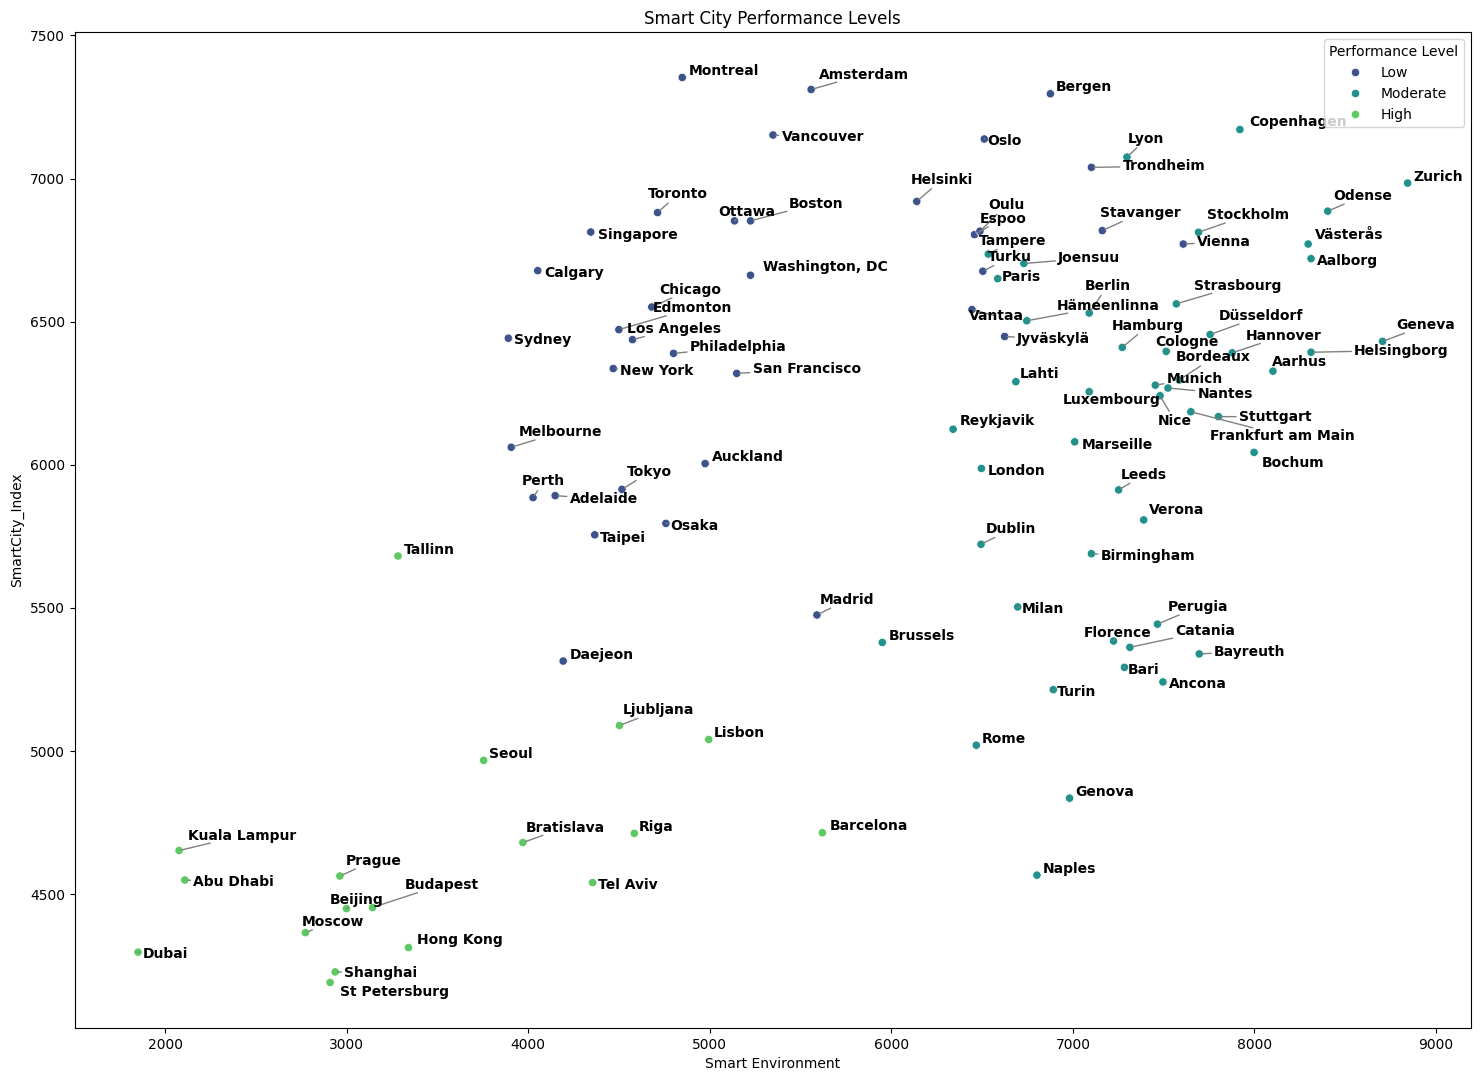

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(16, 12))

# Plot the cities in a scatter plot
scatter_plot = sns.scatterplot(data=smart_city_data, x='Smart_Environment', y='SmartCity_Index', hue='Performance_Level', palette='viridis')

# Add annotations with city names and use adjust_text to avoid overlap
texts = []
for line in range(0, smart_city_data.shape[0]):
    texts.append(plt.text(smart_city_data.Smart_Environment[line], smart_city_data.SmartCity_Index[line],
                          smart_city_data.City[line], horizontalalignment='left', size='medium', color='black', weight='semibold'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.title('Smart City Performance Levels')
plt.xlabel('Smart Environment')
plt.ylabel('SmartCity_Index')
plt.legend(title='Performance Level')
plt.tight_layout(pad=5.0)
plt.show()
